## Report: act_report

In [56]:
twitter_archive_master = pd.read_csv('twitter_archive_master.csv')
twitter_archive_master.head(1)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stages,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,668826086256599040,2015-11-23 16:18:59+00:00,Twitter for iPhone,This is Banditt. He is a brown LaBeouf retriever. Loves cold weather. 4 smaller dogs are his sons (probably). 10/10 https://t.co/Ko7eCsFpnI,https://twitter.com/dog_rates/status/668826086256599040/photo/1,10.0,10.0,Banditt,NaN,112.0,...,1.0,Malinois,0.640185,True,Irish_terrier,0.1537,True,Rhodesian_ridgeback,0.068457,True


## Analyzing and Visualizing Data
In this section, we analyze and visualize our wrangled data. 

1. What is the correlation betweeen retweet_count and favorite_count
2. correlation betweenNumerator rating and likes?
3. Correlation between 'retweet_count','favorite_count', 'rating_numerator'

### Visualization

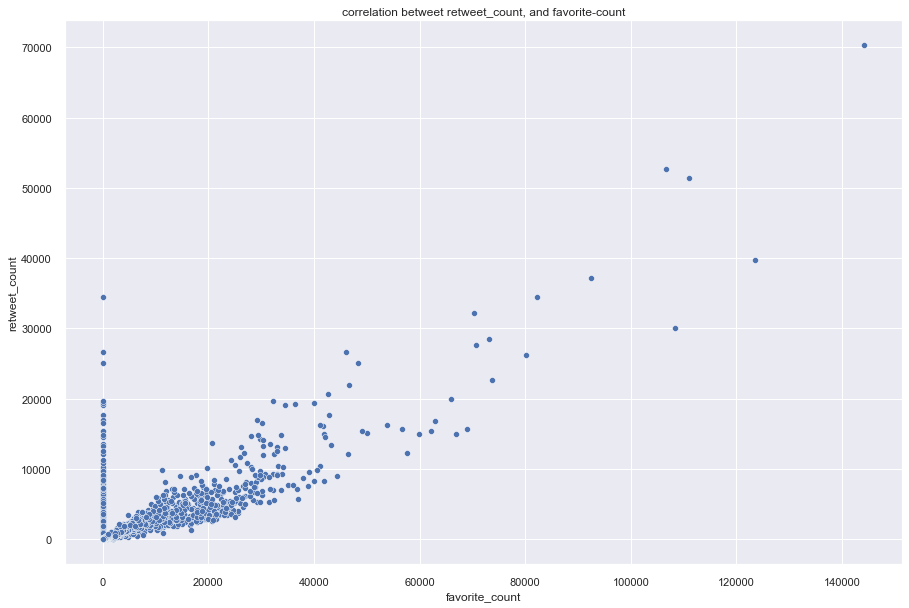

In [57]:
# 1. What is the correlation betweeen retweet_count and favorite_count
#plots a scatter plot to display the correlation between favorite_count and retweet_count
sns.scatterplot(data=twitter_archive_master, x='favorite_count', y='retweet_count').set(title = 'correlation betweet retweet_count, and favorite-count')
sns.set(rc={'figure.figsize':(15, 10)})

The above scatter plot shows that there is a positive correlation between retweet_counts and favorite_counts.

Text(0.5, 1.0, 'Variables Correlation')

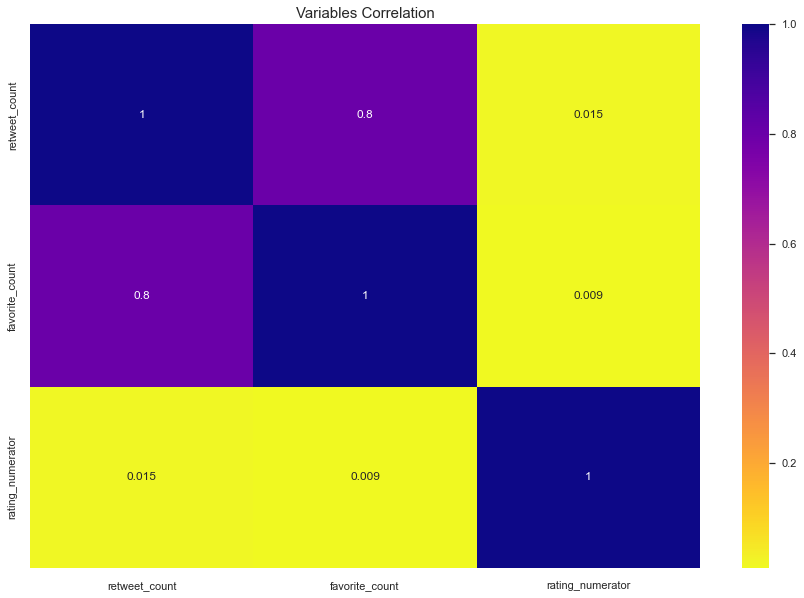

In [58]:
sns.heatmap(twitter_archive_master[['retweet_count','favorite_count', 'rating_numerator']].corr(), cmap="plasma_r", annot=True)
plt.title('Variables Correlation', size=15)

strongest correlation is between retweet_count and and favorite count having a correlation coefficient of 0.8

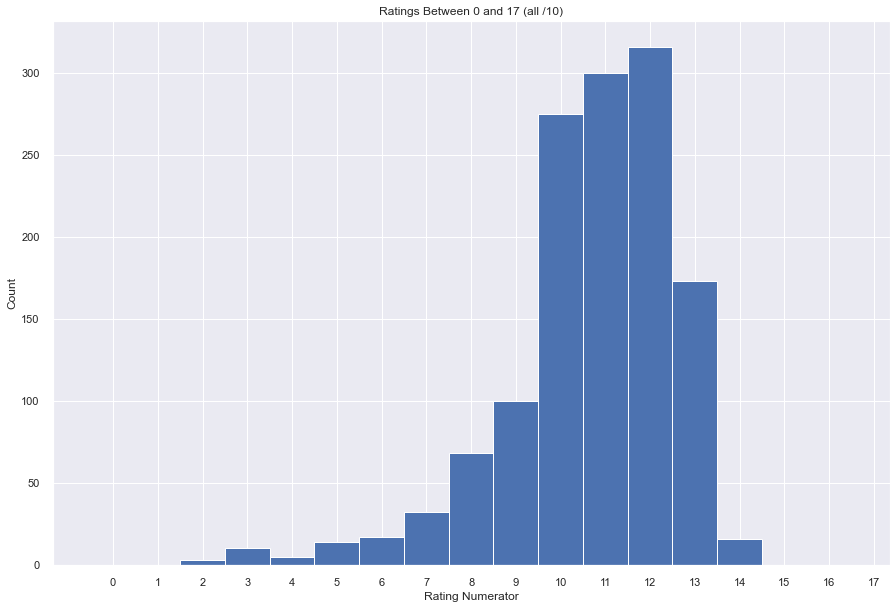

In [59]:
# 2. let's plot the ratings that are less than 20
plt.hist(twitter_archive_master.rating_numerator[twitter_archive_master.rating_numerator <= 17], 
         bins=np.arange(0,18,step=1), align='left');
plt.xticks(np.arange(0,18,step=1));
plt.title('Ratings Between 0 and 17 (all /10)');
plt.xlabel('Rating Numerator');
plt.ylabel('Count');

The bar chart above shows dogs with ratings numerator of between 10-12 have the most likes.

[Text(0.5, 1.0, 'popular dog stage distribution')]

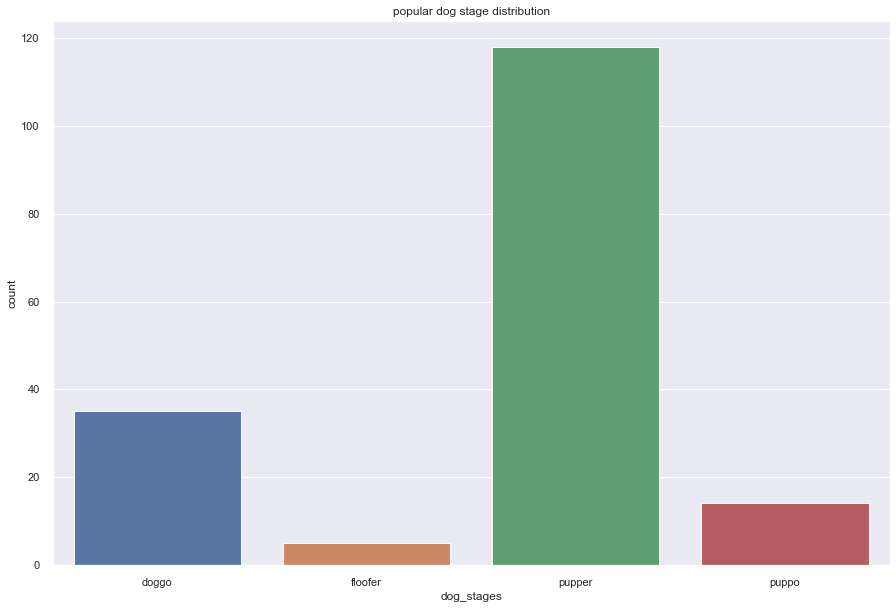

In [60]:
# 3. bar chart of the dog_stages showing the count of the dog stage column 
sns.countplot(x = 'dog_stages', data = twitter_archive_master).set(title = 'popular dog stage distribution')

The bar chart above shows pupper is the most popular dog stage, followed by doggo

In [61]:
twitter_archive_master['dog_stages'].value_counts()

pupper     118
doggo       35
puppo       14
floofer      5
Name: dog_stages, dtype: int64

In [62]:
# 4. Popular source medium for twitter
source_medium = twitter_archive_master['source'].value_counts().index
twitter_archive_master['source'].value_counts()

Twitter for iPhone     1268
Vine - Make a Scene      41
Twitter Web Client       16
TweetDeck                 8
Name: source, dtype: int64

# 4. Popular source medium for twitter

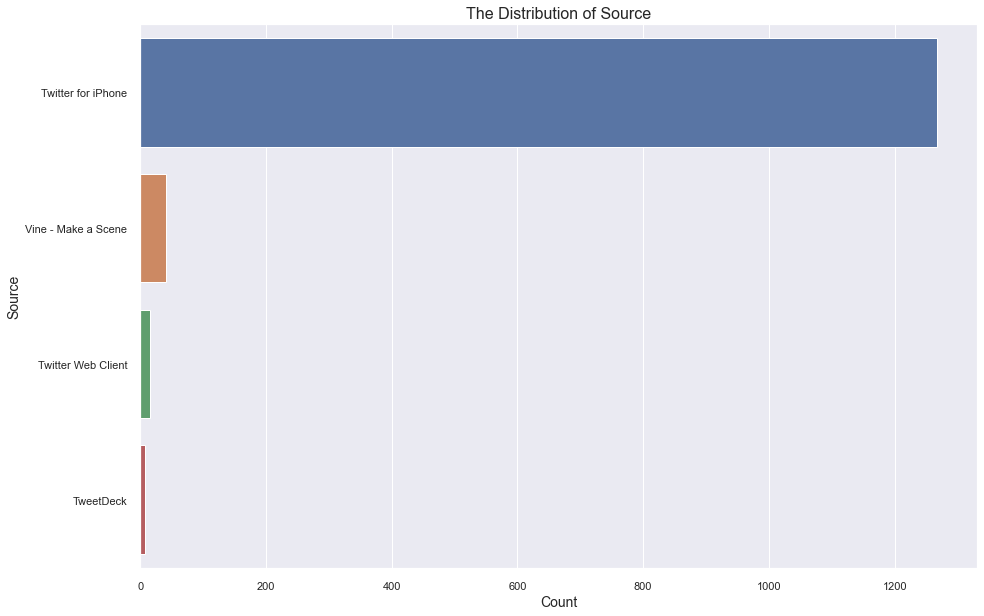

In [63]:
sns.countplot(data = twitter_archive_master, y = 'source', order = source_medium)
plt.xticks(rotation = 360)
plt.xlabel('Count', fontsize=14)
plt.ylabel('Source', fontsize=14)
plt.title('The Distribution of Source',fontsize=16);

Its clearly observed that twitter for iphone was widely used medium that individuals used to access and rate the dogs. Subsequently followed by Vine, Twitter Web Client, TweetDeck.

    - (TweetDeck is a social media dashboard application for management of Twitter accounts. Originally an independent app, TweetDeck was subsequently acquired by Twitter Inc. and integrated into Twitter's interface. It has long ranked as one of the most popular Twitter clients by percentage of tweets posted, alongside the official Twitter web client and the official apps for iPhone and Android.) [https://en.wikipedia.org/wiki/TweetDeck]